In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

$$1.EDA$$

In [59]:
data1=pd.read_csv("train.csv")
data2=pd.read_csv("test.csv")

In [60]:
data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [61]:
data1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [62]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


$$2.Statistical analysis $$

In [63]:
data1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [64]:
#categorical features
def cat_plot(col):
    plt.figure(figsize=(10,6))
    sns.countplot(data1[col],color="green")
    plt.show()

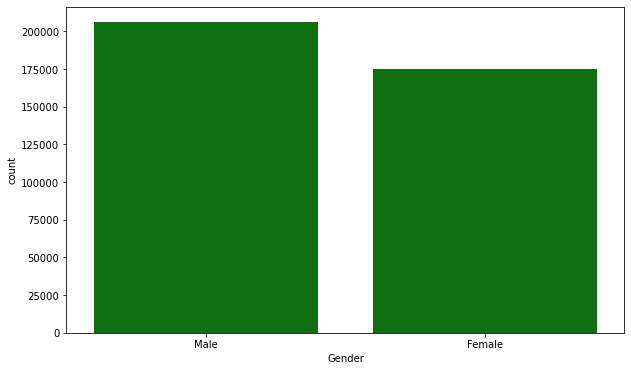

In [65]:
cat_plot('Gender')

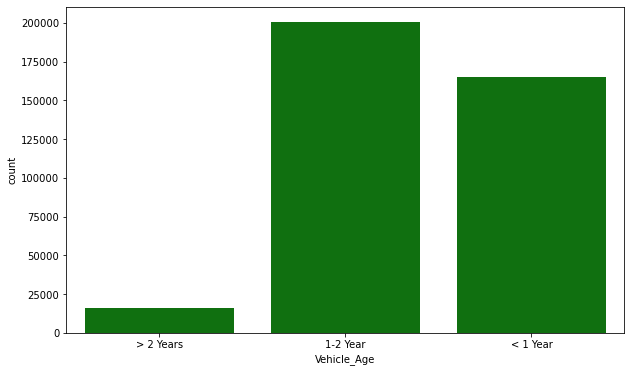

In [66]:
cat_plot('Vehicle_Age')

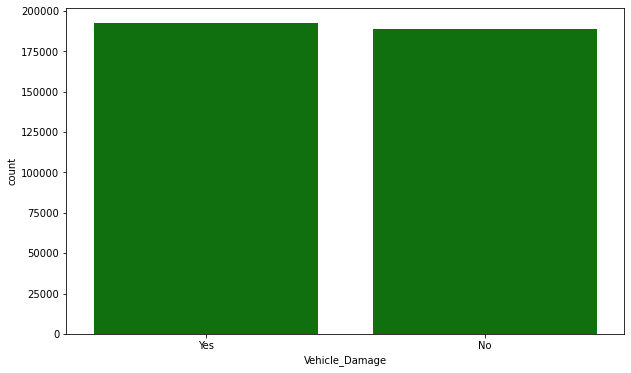

In [67]:
cat_plot('Vehicle_Damage')

In [68]:
def num_plot():
    for col in data1.select_dtypes(include=np.number):
        print('Min:',data1[col].min())
        print('Max:',data1[col].max())
        print('Mean:',data1[col].mean())
        plt.figure(figsize=(10,6))
        sns.distplot(data1[col],color="yellow")
        plt.show()

Min: 1
Max: 381109
Mean: 190555.0


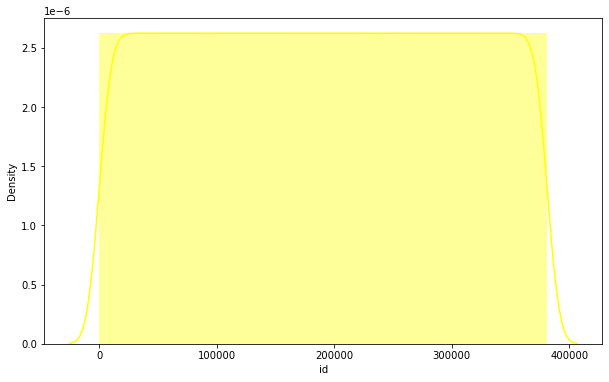

Min: 20
Max: 85
Mean: 38.822583565331705


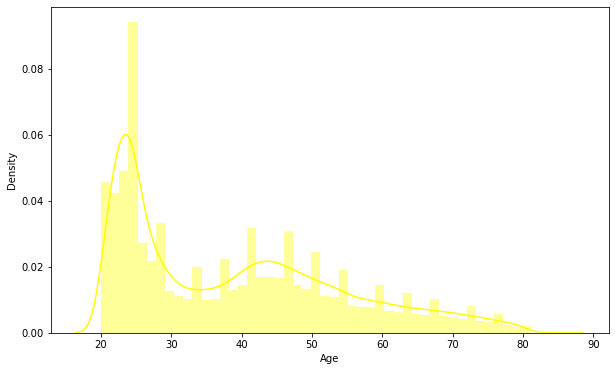

Min: 0
Max: 1
Mean: 0.9978693759528114


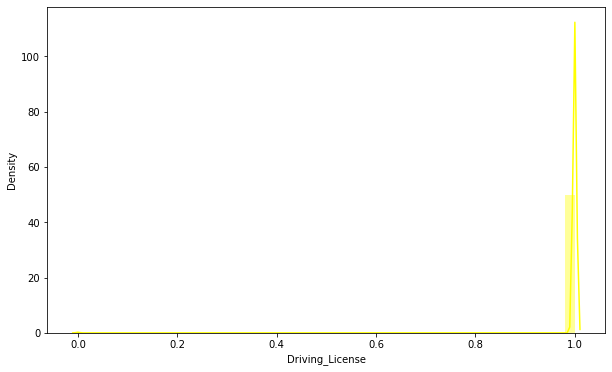

Min: 0.0
Max: 52.0
Mean: 26.388807401557035


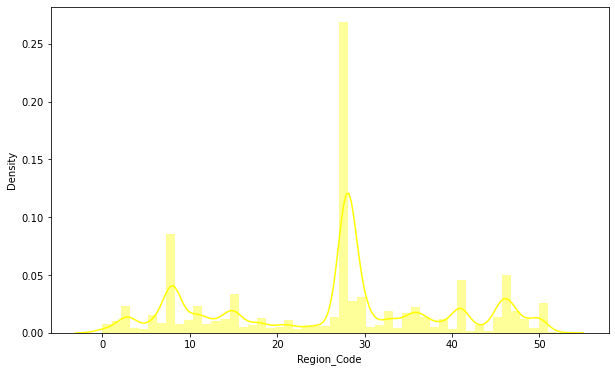

Min: 0
Max: 1
Mean: 0.4582101183650871


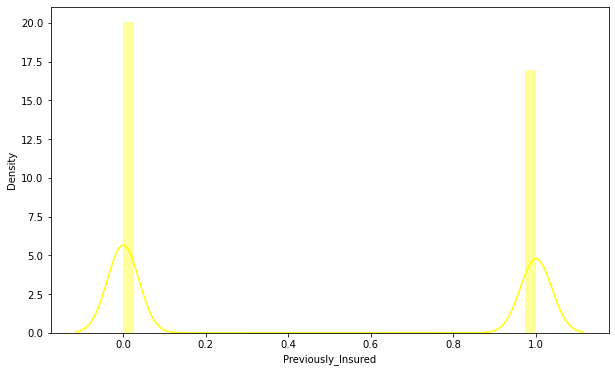

Min: 2630.0
Max: 540165.0
Mean: 30564.389581458323


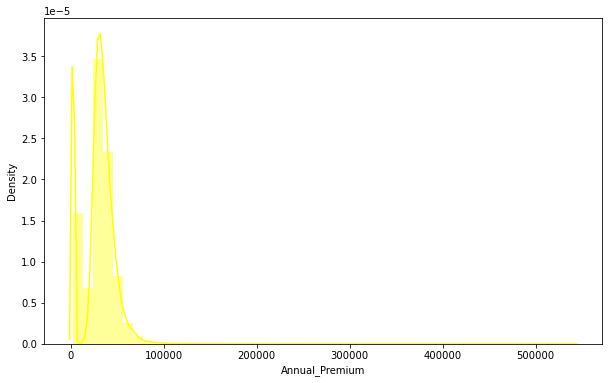

Min: 1.0
Max: 163.0
Mean: 112.03429465061177


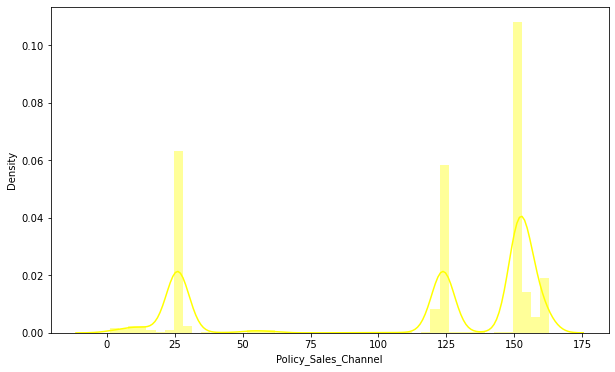

Min: 10
Max: 299
Mean: 154.34739667654136


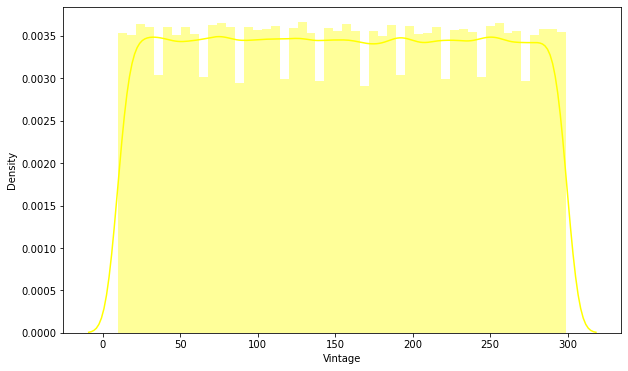

Min: 0
Max: 1
Mean: 0.12256336113815208


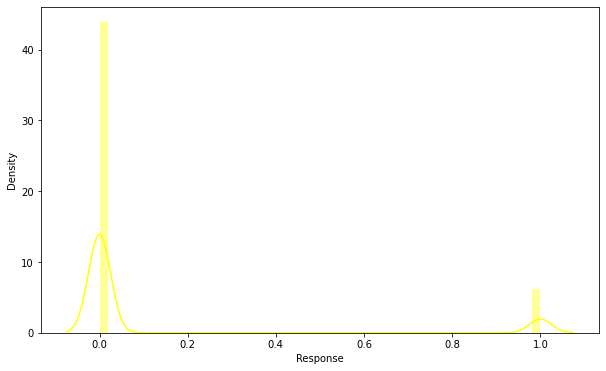

In [69]:
num_plot()

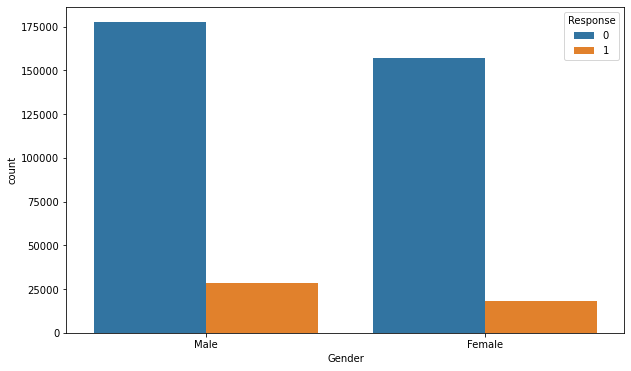

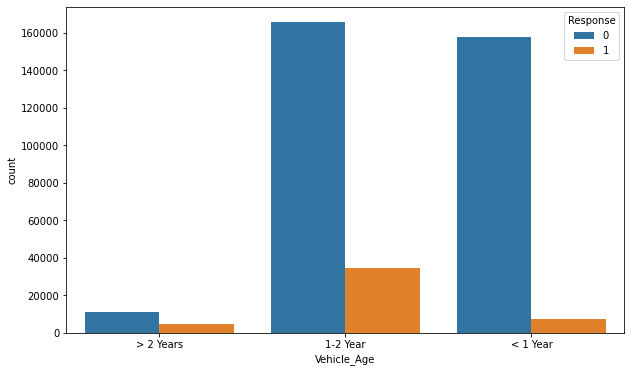

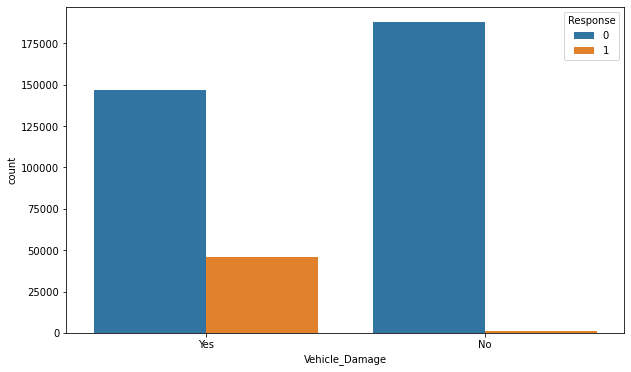

In [70]:
cols=['Gender','Vehicle_Age','Vehicle_Damage']
for i in cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data1[i],hue=data1['Response'])
    plt.show()
    print()

<AxesSubplot:>

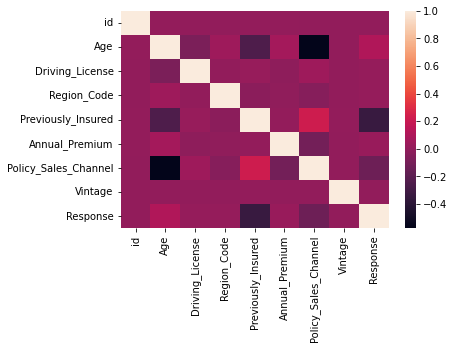

In [71]:
corr=data1.corr()
sns.heatmap(corr)

In [72]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
cat_data1=data1.select_dtypes(exclude=np.number)

In [73]:
print(cat_data1.columns)

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')


In [74]:
lb=LabelEncoder()

In [75]:
for i in cat_data1.columns:
    data1[i]=lb.fit_transform(np.array(data1[i]))

In [76]:
data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [77]:
data2['Response']=data2['Vehicle_Damage']

In [78]:
data2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,No
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,Yes
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,Yes
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,Yes
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,No


In [79]:
cat_data2=data2.select_dtypes(exclude=np.number)

In [80]:
for i in cat_data2.columns:
    data2[i]=lb.fit_transform(np.array(data2[i]))

In [81]:
data2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53,0
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111,1
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199,1
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187,1
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297,0


$$model selection$$

In [82]:
x=data2.drop(['id','Response'],axis=1)
y=data2['Response']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [84]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(101629, 10)
(25408, 10)
(101629,)
(25408, 10)


$$test modelling$$

In [85]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred=lr.predict(x_test)

In [87]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

0.9999212846347607
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12727
           1       1.00      1.00      1.00     12681

    accuracy                           1.00     25408
   macro avg       1.00      1.00      1.00     25408
weighted avg       1.00      1.00      1.00     25408



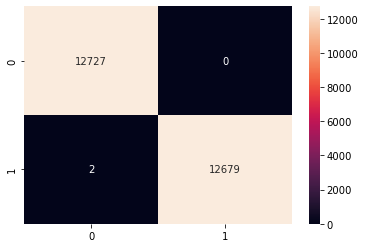

In [88]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [89]:
from sklearn.tree import DecisionTreeClassifier
dect=DecisionTreeClassifier()

In [90]:
dect.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred=dect.predict(x_test)

In [92]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12727
           1       1.00      1.00      1.00     12681

    accuracy                           1.00     25408
   macro avg       1.00      1.00      1.00     25408
weighted avg       1.00      1.00      1.00     25408

